In [1]:
import json

import pandas as pd
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
from matplotlib.patches import Arc

import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns

%matplotlib inline


In [2]:
with open (r"C:\Users\philipp.hollenhorst\OneDrive - ISR Information Products AG\FußballData\Data Analytics with Python\open-data-master (11)\open-data-master\data\\matches\37\42.json", "r") as f:

                obj = json.load(f)




mlist = []

objlist = []

dflist = []

for match in obj:

                mid = match["match_id"]

                mlist.append(mid)




mlist = [str(m) for m in mlist]

mlist = [m+".json" for m in mlist]




for n in mlist:

                file = r"C:\Users\philipp.hollenhorst\OneDrive - ISR Information Products AG\FußballData\Data Analytics with Python\open-data-master (11)\open-data-master\data\/events/" + "/" + n

                with open (file, "r", encoding="utf-8") as f:

                                obj = json.load(f)

                                objlist.append(obj)

for obj in objlist:

    df = json_normalize(obj)

    dflist.append(df)

result = pd.concat(dflist, sort=True)
result
result1 = result[(result["type.name"]=='Starting XI')| (result["type.name"]=='Half Start')| (result["type.name"]=='Tactical Shift')| (result["type.name"]=='Injury Stoppage')|(result["type.name"]=='Half End')|(result["type.name"]=='Substitution')]
index_list = result1.index.tolist()
result= result.drop(index_list)

result = result.reset_index()

C:\Users\philipp.hollenhorst\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [3]:
#result = result[result["team.name"]=="Chelsea FCW"]
result = result.reset_index(drop=True)
result["end_location"] = result["pass.end_location"]
result["carryendl"] = result["carry.end_location"]
result["end_location"].update(result.pop("carryendl"))
#result = result[(result["type.name"]=="Pass") | (result["type.name"]=="Carry")]
#result["end_location"] = result["end_location"].fillna(0)
#result["prior_location"] = result["location"].shift(1)
#result= result.drop([0])
#prior_location = pd.DataFrame(result["prior_location"].values.tolist(),columns=["xprior", "yprior"])
location = pd.DataFrame(result[(result["type.name"]=="Pass")| (result["type.name"]=="Carry")]["location"].values.tolist(),columns=["xstart", "ystart"])
end_location = pd.DataFrame(result[(result["type.name"]=="Pass")| (result["type.name"]=="Carry")]["end_location"].values.tolist(),columns=["xend", "yend"])
#carryend_location = pd.DataFrame(result4.values.tolist(),columns=["xendcarry", "yendcarry"])
result0 = pd.concat([location, end_location], axis=1)
#result5 = pd.DataFrame(result0.values.tolist(), columns=["xstart","ystart","xend", "yend"])
#result = pd.concat([result,result5],axis=1)
result
result['underpressure'] = result['under_pressure'].apply(lambda x: 1 if x ==True else 0)
result['nextactionu_p'] = result['underpressure'].shift(-1)
result['nextaction_name'] = result['type.name'].shift(-1)
result['nextaction_name2'] = result['type.name'].shift(-2)
#result["next_action_x"] = result["location"].shift(-1)
#result["next_action_y"] = result['location'].shift(-1)
#result["next_action_x2"] = result['xstart'].shift(-2)
#result["next_action_y2"] = result['ystart'].shift(-2)
result["prior_action_name"] = result['type.name'].shift(1)
result["prior_action_name2"] = result['type.name'].shift(2)
#["prior_action_x"] = result['xstart'].shift(1)
#result["prior_action_y"] = result['ystart'].shift(1)
#result["prior_action_x2"] = result['xstart'].shift(2)
#result["prior_action_y2"] = result['ystart'].shift(2)
result = result[(result["type.name"]=="Pass") | (result["type.name"]=="Carry")]
result = result.reset_index(drop=True)
result = pd.concat([result,result0],axis=1)

In [4]:
import math
df = result
#df['underpressure'] = df['under_pressure'].apply(lambda x: 1 if x ==True else 0)
#df['nextactionu_p'] = df['underpressure'].shift(-1)
df = df[df["underpressure"]==1][["type.name","under_pressure","xstart","ystart","xend","yend","underpressure","nextactionu_p","nextaction_name","nextaction_name2","prior_action_name","prior_action_name2","ball_receipt.outcome.name","duration","pass.angle","pass.height.name","pass.length","pass.outcome.name","pass.recipient.name","pass.type.name","play_pattern.name","player.name","position.name","possession_team.name"]]

df['beginning'] = np.sqrt(np.square(120-df['xstart']) + np.square(40 - df['ystart']))
df['end'] = np.sqrt(np.square(120 - df['xend']) + np.square(40 - df['yend']))
df["distance"] = (df["end"] - df["beginning"])
df["prog"] = df["end"]/df["beginning"]
#df['progressive'] = [(df['end'][x]) / (df['beginning'][x]) < .75 for x in range(len(df.beginning))]
df["changex"] = df["xstart"] - df["xend"]
df['angle1'] = np.degrees(np.arctan2(df['yend']-df['ystart'],df['xend']-df['xstart']))
df['angle1'] = np.where(df['angle1']<0,df['angle1']+360,df['angle1'])
df = df.reset_index()
df


,index,type.name,under_pressure,xstart,ystart,xend,yend,underpressure,nextactionu_p,nextaction_name,nextaction_name2,prior_action_name,prior_action_name2,ball_receipt.outcome.name,duration,pass.angle,pass.height.name,pass.length,pass.outcome.name,pass.recipient.name,pass.type.name,play_pattern.name,player.name,position.name,possession_team.name,beginning,end,distance,prog,changex,angle1
0,3,Carry,True,77.7,75.4,84.6,72.5,1,1.0,Miscontrol,Ball Recovery,Ball Receipt*,Pressure,NaN,0.610300,NaN,NaN,NaN,NaN,NaN,NaN,From Kick Off,Natasha Harding,Right Back,Reading WFC,55.158408,48.056321,-7.102087,0.871242,-6.9,337.203479
1,4,Carry,True,33.2,7.6,33.2,2.8,1,0.0,Pressure,Pass,Ball Recovery,Miscontrol,NaN,4.470062,NaN,NaN,NaN,NaN,NaN,NaN,From Kick Off,Laura Vetterlein,Left Back,Reading WFC,92.649879,94.435587,1.785708,1.019274,0.0,270.000000
2,6,Carry,True,44.3,3.7,43.1,4.3,1,0.0,Dribbled Past,Dribble,Pressure,Pass,NaN,0.543583,NaN,NaN,NaN,NaN,NaN,NaN,From Kick Off,Kate Longhurst,Left Defensive Midfield,Reading WFC,83.953439,84.782663,0.829224,1.009877,1.2,153.434949
3,7,Carry,True,71.2,74.1,77.4,74.1,1,0.0,Pass,Ball Receipt*,Ball Recovery,Pressure,NaN,1.742355,NaN,NaN,NaN,NaN,NaN,NaN,From Kick Off,Fara Williams,Center Attacking Midfield,Reading WFC,59.533604,54.567115,-4.966489,0.916577,-6.2,0.000000
4,10,Carry,True,6.8,31.6,8.7,37.6,1,0.0,Pressure,Pass,Ball Receipt*,Pass,NaN,2.297598,NaN,NaN,NaN,NaN,NaN,NaN,From Free Kick,Anne Moorhouse,Goalkeeper,West Ham United LFC,113.511233,111.325873,-2.185360,0.980748,-1.9,72.428741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28489,97735,Pass,True,65.1,9.1,69.6,8.1,1,0.0,Ball Receipt*,Interception,Pass,Carry,NaN,0.263238,-0.218669,Ground Pass,4.609772,Incomplete,Amalie Vevle Eikeland,NaN,From Throw In,Mayumi Pacheco,Left Back,Arsenal WFC,62.998571,59.647045,-3.351526,0.946800,-4.5,347.471192
28490,97741,Carry,True,13.3,68.2,10.7,76.5,1,1.0,Pass,Ball Receipt*,Ball Recovery,Pressure,NaN,8.097732,NaN,NaN,NaN,NaN,NaN,NaN,Regular Play,Kim Little,Right Center Midfield,Reading WFC,110.363626,115.233415,4.869789,1.044125,2.6,107.393322
28491,97742,Pass,True,10.7,76.5,5.0,77.6,1,0.0,Ball Receipt*,Carry,Carry,Ball Recovery,NaN,1.068645,2.950954,Ground Pass,5.805170,NaN,Leah Williamson,NaN,Regular Play,Kim Little,Right Center Midfield,Reading WFC,115.233415,120.990743,5.757328,1.049962,5.7,169.077195
28492,97745,Carry,True,79.0,23.5,83.3,19.2,1,0.0,Pressure,Carry,Dribble,Dribbled Past,NaN,1.330094,NaN,NaN,NaN,NaN,NaN,NaN,Regular Play,Josanne Potter,Left Center Back,Reading WFC,44.195588,42.184476,-2.011112,0.954495,-4.3,315.000000


In [5]:
dfneg = df[df["distance"]<0]
dfneg["distance"] = dfneg["distance"]*-1
dfneg
dfpos = df[df["distance"]>=0]
df = pd.concat([dfneg,dfpos],axis=0,join="inner")
df = df.sort_values(by="index")
df

C:\Users\philipp.hollenhorst\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,type.name,under_pressure,xstart,ystart,xend,yend,underpressure,nextactionu_p,nextaction_name,nextaction_name2,prior_action_name,prior_action_name2,ball_receipt.outcome.name,duration,pass.angle,pass.height.name,pass.length,pass.outcome.name,pass.recipient.name,pass.type.name,play_pattern.name,player.name,position.name,possession_team.name,beginning,end,distance,prog,changex,angle1
0,3,Carry,True,77.7,75.4,84.6,72.5,1,1.0,Miscontrol,Ball Recovery,Ball Receipt*,Pressure,NaN,0.610300,NaN,NaN,NaN,NaN,NaN,NaN,From Kick Off,Natasha Harding,Right Back,Reading WFC,55.158408,48.056321,7.102087,0.871242,-6.9,337.203479
1,4,Carry,True,33.2,7.6,33.2,2.8,1,0.0,Pressure,Pass,Ball Recovery,Miscontrol,NaN,4.470062,NaN,NaN,NaN,NaN,NaN,NaN,From Kick Off,Laura Vetterlein,Left Back,Reading WFC,92.649879,94.435587,1.785708,1.019274,0.0,270.000000
2,6,Carry,True,44.3,3.7,43.1,4.3,1,0.0,Dribbled Past,Dribble,Pressure,Pass,NaN,0.543583,NaN,NaN,NaN,NaN,NaN,NaN,From Kick Off,Kate Longhurst,Left Defensive Midfield,Reading WFC,83.953439,84.782663,0.829224,1.009877,1.2,153.434949
3,7,Carry,True,71.2,74.1,77.4,74.1,1,0.0,Pass,Ball Receipt*,Ball Recovery,Pressure,NaN,1.742355,NaN,NaN,NaN,NaN,NaN,NaN,From Kick Off,Fara Williams,Center Attacking Midfield,Reading WFC,59.533604,54.567115,4.966489,0.916577,-6.2,0.000000
4,10,Carry,True,6.8,31.6,8.7,37.6,1,0.0,Pressure,Pass,Ball Receipt*,Pass,NaN,2.297598,NaN,NaN,NaN,NaN,NaN,NaN,From Free Kick,Anne Moorhouse,Goalkeeper,West Ham United LFC,113.511233,111.325873,2.185360,0.980748,-1.9,72.428741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28489,97735,Pass,True,65.1,9.1,69.6,8.1,1,0.0,Ball Receipt*,Interception,Pass,Carry,NaN,0.263238,-0.218669,Ground Pass,4.609772,Incomplete,Amalie Vevle Eikeland,NaN,From Throw In,Mayumi Pacheco,Left Back,Arsenal WFC,62.998571,59.647045,3.351526,0.946800,-4.5,347.471192
28490,97741,Carry,True,13.3,68.2,10.7,76.5,1,1.0,Pass,Ball Receipt*,Ball Recovery,Pressure,NaN,8.097732,NaN,NaN,NaN,NaN,NaN,NaN,Regular Play,Kim Little,Right Center Midfield,Reading WFC,110.363626,115.233415,4.869789,1.044125,2.6,107.393322
28491,97742,Pass,True,10.7,76.5,5.0,77.6,1,0.0,Ball Receipt*,Carry,Carry,Ball Recovery,NaN,1.068645,2.950954,Ground Pass,5.805170,NaN,Leah Williamson,NaN,Regular Play,Kim Little,Right Center Midfield,Reading WFC,115.233415,120.990743,5.757328,1.049962,5.7,169.077195
28492,97745,Carry,True,79.0,23.5,83.3,19.2,1,0.0,Pressure,Carry,Dribble,Dribbled Past,NaN,1.330094,NaN,NaN,NaN,NaN,NaN,NaN,Regular Play,Josanne Potter,Left Center Back,Reading WFC,44.195588,42.184476,2.011112,0.954495,-4.3,315.000000


In [6]:
df1 = df
##pressmover#
df1["presscarry"] = np.where((df1["type.name"]=="Carry") & (df1["prior_action_name"]=="Ball Receipt*") & (df1["nextactionu_p"]==0),1,0)
df1["pressmover"] = np.where((df1["nextactionu_p"]==1) & (df1["pass.outcome.name"]!="Incomplete"),1,0)
df1["pressreliever"] = np.where((df1["nextactionu_p"]==0) & (df1["changex"]>=-15) & (df1["changex"]<=15) & (df1["xstart"]<=80)& (df1["pass.outcome.name"]!="Incomplete") ,1,0)
df1["pressbreaker"] = np.where((df1["nextactionu_p"]==0) & (df1["changex"]<=-15)& (df1["pass.outcome.name"]!="Incomplete"),1,0)
df1["pressloser"] = np.where(df1["pass.outcome.name"]=="Incomplete",1,0)

#(np.where((a > 2) & (a < 6), -1, 100))
#np.where((data['COL'] != '01 thing') | 
 #                      (data['COL'] != '02 thing'), 'other', data['COL'])
len(df1[df1["pressbreaker"]==1])
df2 = df1[df1["presscarry"]==1]

In [7]:
df10 = df
##pressmover#

df["press"] = np.where((df["nextactionu_p"]==1),"pressmover","pressreliever")
#df["press"] = np.where((df["nextactionu_p"]==0),"pressreliever",0)
#df["press"] = np.where((df["nextactionu_p"]==0) & (df["changex"]<=10),"pressbreaker",0)
#df["press"] = np.where(df["pass.outcome.name"]=="Incomplete","pressloser",0)
df

,index,type.name,under_pressure,xstart,ystart,xend,yend,underpressure,nextactionu_p,nextaction_name,nextaction_name2,prior_action_name,prior_action_name2,ball_receipt.outcome.name,duration,pass.angle,pass.height.name,pass.length,pass.outcome.name,pass.recipient.name,pass.type.name,play_pattern.name,player.name,position.name,possession_team.name,beginning,end,distance,prog,changex,angle1,presscarry,pressmover,pressreliever,pressbreaker,pressloser,press
0,3,Carry,True,77.7,75.4,84.6,72.5,1,1.0,Miscontrol,Ball Recovery,Ball Receipt*,Pressure,NaN,0.610300,NaN,NaN,NaN,NaN,NaN,NaN,From Kick Off,Natasha Harding,Right Back,Reading WFC,55.158408,48.056321,7.102087,0.871242,-6.9,337.203479,0,1,0,0,0,pressmover
1,4,Carry,True,33.2,7.6,33.2,2.8,1,0.0,Pressure,Pass,Ball Recovery,Miscontrol,NaN,4.470062,NaN,NaN,NaN,NaN,NaN,NaN,From Kick Off,Laura Vetterlein,Left Back,Reading WFC,92.649879,94.435587,1.785708,1.019274,0.0,270.000000,0,0,1,0,0,pressreliever
2,6,Carry,True,44.3,3.7,43.1,4.3,1,0.0,Dribbled Past,Dribble,Pressure,Pass,NaN,0.543583,NaN,NaN,NaN,NaN,NaN,NaN,From Kick Off,Kate Longhurst,Left Defensive Midfield,Reading WFC,83.953439,84.782663,0.829224,1.009877,1.2,153.434949,0,0,1,0,0,pressreliever
3,7,Carry,True,71.2,74.1,77.4,74.1,1,0.0,Pass,Ball Receipt*,Ball Recovery,Pressure,NaN,1.742355,NaN,NaN,NaN,NaN,NaN,NaN,From Kick Off,Fara Williams,Center Attacking Midfield,Reading WFC,59.533604,54.567115,4.966489,0.916577,-6.2,0.000000,0,0,1,0,0,pressreliever
4,10,Carry,True,6.8,31.6,8.7,37.6,1,0.0,Pressure,Pass,Ball Receipt*,Pass,NaN,2.297598,NaN,NaN,NaN,NaN,NaN,NaN,From Free Kick,Anne Moorhouse,Goalkeeper,West Ham United LFC,113.511233,111.325873,2.185360,0.980748,-1.9,72.428741,1,0,1,0,0,pressreliever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28489,97735,Pass,True,65.1,9.1,69.6,8.1,1,0.0,Ball Receipt*,Interception,Pass,Carry,NaN,0.263238,-0.218669,Ground Pass,4.609772,Incomplete,Amalie Vevle Eikeland,NaN,From Throw In,Mayumi Pacheco,Left Back,Arsenal WFC,62.998571,59.647045,3.351526,0.946800,-4.5,347.471192,0,0,0,0,1,pressreliever
28490,97741,Carry,True,13.3,68.2,10.7,76.5,1,1.0,Pass,Ball Receipt*,Ball Recovery,Pressure,NaN,8.097732,NaN,NaN,NaN,NaN,NaN,NaN,Regular Play,Kim Little,Right Center Midfield,Reading WFC,110.363626,115.233415,4.869789,1.044125,2.6,107.393322,0,1,0,0,0,pressmover
28491,97742,Pass,True,10.7,76.5,5.0,77.6,1,0.0,Ball Receipt*,Carry,Carry,Ball Recovery,NaN,1.068645,2.950954,Ground Pass,5.805170,NaN,Leah Williamson,NaN,Regular Play,Kim Little,Right Center Midfield,Reading WFC,115.233415,120.990743,5.757328,1.049962,5.7,169.077195,0,0,1,0,0,pressreliever
28492,97745,Carry,True,79.0,23.5,83.3,19.2,1,0.0,Pressure,Carry,Dribble,Dribbled Past,NaN,1.330094,NaN,NaN,NaN,NaN,NaN,NaN,Regular Play,Josanne Potter,Left Center Back,Reading WFC,44.195588,42.184476,2.011112,0.954495,-4.3,315.000000,0,0,1,0,0,pressreliever


In [8]:
df3 = df1.groupby("player.name",sort=True,as_index=False)["pressmover","pressreliever","pressbreaker","pressloser","presscarry"].sum()
df3 = df3.sort_values(by=["pressbreaker"],ascending=False).reset_index(drop=True)
df3

C:\Users\philipp.hollenhorst\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,player.name,pressmover,pressreliever,pressbreaker,pressloser,presscarry
0,Leah Williamson,61,189,47,27,82
1,Stephanie Houghton,26,134,42,28,73
2,Melissa Lawley,53,133,39,18,100
3,Gabrielle George,41,128,37,24,71
4,Katie McCabe,58,136,36,32,97
5,Lauren Hemp,40,86,35,24,82
6,Niamh Charles,40,87,33,20,74
7,Rinsola Babajide,34,53,31,14,58
8,Felicity Gibbons,34,135,30,34,78
9,Janine Beckie,41,87,29,30,86


In [9]:
import json
import pandas as pd
from pandas import json_normalize
import numpy as np

import requests
from tqdm import tqdm
from sklearn.preprocessing import minmax_scale

from matplotlib import cm
import matplotlib.pyplot as plt
import cmasher as cmr
import json
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.projections import get_projection_class
from matplotlib.patches import Arc
import io
import matplotlib.image as image
from matplotlib import transforms
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch

In [10]:
def sonar_pass1(p1,df,ax):
    pdf = df.loc[df["player.name"] == p1] ##filter only passes for the team in question
    pdf = pdf[pdf["type.name"]=="Pass"]
    df1 = pdf.loc[:, ["angle1","distance"]] ##just take in lengths and angles of passes
    bin_size=24
    bins = np.arange(0,360+bin_size,bin_size) ##change 24 to something else if you want more/less bins
    df1['bins'] = pd.cut(df1['angle1'], bins, include_lowest=True, right = True)
    df1["bin_mids"] = df1["bins"].apply(lambda x: x.mid)
    A = df1.groupby(["bin_mids"]).agg(frequency=("distance", "size"), alength = ("distance", "mean")).reset_index()
    A["freq"] = minmax_scale(A.frequency) ##scale to [0,1]
    #A['distance'] = A['distance'].fillna(value=0)
    #A['distance'] = A['distance']
    #A['Count'] = df1.groupby('bin_mids',as_index=False)['angle1'].count().angle.tolist()
    A["freq"] = minmax_scale(A.frequency) ##scale to [0,1]
    A["centers"] = np.deg2rad(A.bin_mids.tolist())
    maxl = np.max(A["freq"])
    minl = np.min(A["freq"])
    normalizedplayer = [(x-minl)/(maxl-minl) for x in A["freq"]]
    #cmap = plt.get_cmap('rainforest')
    ax.bar(A["centers"], A.alength, width=np.deg2rad(bin_size),
                    bottom=0.0,color="white", edgecolor='k',linewidth=1)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction("clockwise")
    ax.set_ylim(0,25)
    ax.set_yticklabels([])
    ax.set_xticklabels(["forward","","right","","backwards","","left",""])
    ax.grid(False)
    ax.spines['polar'].set_color('w')

    ################################################
    pdf1 = df.loc[df["player.name"] == p1] ##filter only passes for the team in question
    pdf1 = pdf1[(pdf1["type.name"]=="Pass") & (pdf["pass.outcome.name"]!="Incomplete")]
    df11 = pdf1.loc[:, ["angle1","distance"]] ##just take in lengths and angles of passes
    bin_size=24
    bins = np.arange(0,360+bin_size,bin_size) ##change 24 to something else if you want more/less bins
    df11['bins'] = pd.cut(df11['angle1'], bins, include_lowest=True, right = True)
    df11["bin_mids"] = df11["bins"].apply(lambda x: x.mid)
    A1 = df11.groupby(["bin_mids"]).agg(frequency=("distance", "size"), alength = ("distance", "mean")).reset_index()
    A1["freq"] = minmax_scale(A1.frequency) ##scale to [0,1]
    #A['distance'] = A['distance'].fillna(value=0)
    #A['distance'] = A['distance']
    #A['Count'] = df1.groupby('bin_mids',as_index=False)['angle1'].count().angle.tolist()
    A1["freq"] = minmax_scale(A1.frequency) ##scale to [0,1]
    A1["centers"] = np.deg2rad(A1.bin_mids.tolist())
    maxl = np.max(A1["freq"])
    minl = np.min(A1["freq"])
    normalizedplayer = [(x-minl)/(maxl-minl) for x in A1["freq"]]
    cmap = cmr.rainforest                   # CMasher
    cmap = plt.get_cmap('cmr.flamingo')
    ax.bar(A1["centers"], A1.alength, width=np.deg2rad(bin_size),
                    bottom=0.0,color=cmap(normalizedplayer), edgecolor='k',alpha=1,linewidth=2,linestyle="--")
    ax.set_theta_zero_location("N")
    ax.set_theta_direction("clockwise")
    ax.set_ylim(0,25)
    ax.set_yticklabels(["5 M", "10 M", "15 M", "20 M", "25 M"], color="black",fontweight="bold",rotation=180)
    #ax.set_xticklabels([])
    ax.grid(False)
    ax.spines['polar'].set_color('w')
    #norm = plt.Normalize(A1["alength"].min(), 25)
    #sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
    #sm.set_array([])
    #cbar = fig.colorbar(sm,orientation="horizontal")
    #cbar.ax.set_xlabel("Average length of passes in a direction", fontstyle = "italic", fontsize =10)
    #cbar.ax.xaxis.set_tick_params(color = "xkcd:salmon")
    #plt.setp(plt.getp(cbar.ax, "xticklabels"), color = "xkcd:salmon")
    
     
    
def sonar_carry1(p1,df,ax):
    pdf = df.loc[df["player.name"] == p1] ##filter only passes for the team in question
    pdf = pdf[pdf["type.name"]=="Carry"]
    df1 = pdf.loc[:, ["angle1","distance"]] ##just take in lengths and angles of passes
    bin_size=24
    bins = np.arange(0,360+bin_size,bin_size) ##change 24 to something else if you want more/less bins
    df1['bins'] = pd.cut(df1['angle1'], bins, include_lowest=True, right = True)
    df1["bin_mids"] = df1["bins"].apply(lambda x: x.mid)
    A = df1.groupby(["bin_mids"]).agg(frequency=("distance", "size"), alength = ("distance", "mean")).reset_index()
    A["freq"] = minmax_scale(A.frequency) ##scale to [0,1]
    #A['distance'] = A['distance'].fillna(value=0)
    #A['distance'] = A['distance']
    #A['Count'] = df1.groupby('bin_mids',as_index=False)['angle1'].count().angle.tolist()
    A["freq"] = minmax_scale(A.frequency) ##scale to [0,1]
    A["centers"] = np.deg2rad(A.bin_mids.tolist())
    maxl = np.max(A["freq"])
    minl = np.min(A["freq"])
    normalizedplayer = [(x-minl)/(maxl-minl) for x in A["freq"]]
    cmap = cmr.rainforest                   # CMasher
    cmap = plt.get_cmap('cmr.flamingo')
    ax.bar(A["centers"], A.alength, width=np.deg2rad(bin_size),
                    bottom=0.0,color=cmap(normalizedplayer), edgecolor='k',alpha=1,linewidth=2,linestyle="--")
    ax.set_theta_zero_location("N")
    ax.set_theta_direction("clockwise")
    ax.set_ylim(0,10)
    ax.set_yticklabels(["2","4","6","8","10"],color="black",fontweight="bold",rotation=180)
    ax.set_xticklabels(["forward","","right","","backwards","","left",""])
    ax.grid(False)
    ax.spines['polar'].set_color('w')
    
   

In [11]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, interactive_output

xr1=widgets.IntRangeSlider(value=[0, 120],min=0,max=120,description='X Range:',
                                        step=1,disabled=False,style={'description_width': 'initial'},
                                        readout=True,readout_format='.1f')
yr1=widgets.IntRangeSlider(value=[0, 68],min=0,max=80,description='Y Range:',
                                        step=1,disabled=False,style={'description_width': 'initial'},
                                        readout=True,readout_format='.1f')

ang1=widgets.FloatSlider(value=360,min=0,max=360.0,
                            step=1,description='Angular Range:',
                         style={'description_width': 'initial'},
                        disabled=False,continuous_update=False,
                        orientation='horizontal',readout=True,
                        readout_format='.1f')

player1 = widgets.Dropdown(
    options=df["player.name"].unique(),
    value='Jordan Nobbs',
    description='Player 1',
    disabled=False,
)

press = widgets.Dropdown(
    options=df["press"].unique(),
    value='pressmover',
    description='',
    disabled=False,
)

pitch =VerticalPitch(pitch_type='statsbomb',line_zorder=2,
                      line_color='#636363',constrained_layout=True,
                      tight_layout=False,pad_top=10)
#presstype = widgets.Dropdown(
#    options=["up,pressbreaker]
ui = widgets.HBox([xr1,yr1, ang1, player1])

def arrowplotter(dataframe,pitch,ax,color,X1,Y1,X2,Y2,zorder):
    pitch.arrows(dataframe[X1], dataframe[Y1],
             dataframe[X2], dataframe[Y2], width=2, zorder= zorder,
             headwidth=3, headlength=3, color=color, ax=ax)

    pitch =VerticalPitch(pitch_type='statsbomb',line_zorder=2,
                      line_color='#636363',constrained_layout=True,
                      tight_layout=False,pad_top=10)

    #fig,ax = pitch.draw(figsize=(6.8,10.5))
    #fig.set_facecolor('#082630')
    #ax.set_title('Two examples of Quick Combinations',fontsize=25,color='w')
    #arrowplotter(df.loc[0],pitch,ax,'#ad993c','xstart','ystart','xend','yend',4)
    #arrowplotter(df.loc[0],pitch,ax,'#ba4f45','x2','y2','endX2','endY2',5)

    #arrowplotter(df.loc[2],pitch,ax,'#ad993c','xstart','ystart','xend','yend',4)
    #arrowplotter(df.loc[2],pitch,ax,'violet','x2','y2','endX2','endY2',5)

    #pitch.arrows(110,65,110,55,width=2, zorder=4,
                 #headwidth=6, headlength=5, color='#ad993c', ax=ax)

def Pressureplotter(xrange,yrange,angle,p1):

    fig = plt.figure(figsize=(15, 15))
    # fig.subplots_adjust(wspace=0)
    ax1 = fig.add_subplot(221)
    ax = fig.add_subplot(222, polar=True)
    dff = df[df["player.name"]==p1]
    dffp = dff[dff["type.name"]=="Pass"]
    fig.set_facecolor('w')
    pitch.draw(ax1)
    cmap = cmr.flamingo                   # CMasher
    cmap = plt.get_cmap('cmr.flamingo')
    
    cond1 = ((dffp['angle1'] > 0.0) & (dffp['angle1'] <= angle))
    cond2 = ((dffp['angle1'] >= 360-angle) & (dffp['angle1'] <= 360.0))
    zonex = (dffp.xend >= xrange[0]) & (dffp.xend <= xrange[1])
    zoney = (dffp.yend >= yrange[0]) & (dffp.yend <= yrange[1])
    
    playername1 = dffp["player.name"] ==p1
    
    arrowplotter(dffp[(cond1 | cond2) & playername1 & zonex & zoney],pitch,ax1,
                 'pink','xstart','ystart','xend','yend',4)
    
    ax1.title.set(text=p1 + " Under Pressure Passes", color="k", fontweight="bold", size=15)
    
    sonar_pass1(p1,dffp[(cond1 | cond2) & playername1 & zonex & zoney],ax)
    ax.title.set(text=p1 + " Under Pressure Pass Sonar", color="k", fontweight="bold", size=15)
    
    return fig
   


w2 = interactive_output(Pressureplotter,{'xrange':xr1,'yrange':yr1,'angle':ang1,'p1':player1})
display(ui, w2)


Output()

In [12]:

def Pressureplotter_Carry(xrange,yrange,angle,p1):

    fig = plt.figure(figsize=(15, 15))
    # fig.subplots_adjust(wspace=0)
    ax1 = fig.add_subplot(221)
    ax = fig.add_subplot(222, polar=True)
    dff = df[df["player.name"]==p1]
    dffp = dff[dff["type.name"]=="Carry"]
    fig.set_facecolor('w')
    pitch.draw(ax1)
    cmap = cmr.flamingo                   # CMasher
    cmap = plt.get_cmap('cmr.flamingo')
    
    cond1 = ((dffp['angle1'] > 0.0) & (dffp['angle1'] <= angle))
    cond2 = ((dffp['angle1'] >= 360-angle) & (dffp['angle1'] <= 360.0))
    zonex = (dffp.xend >= xrange[0]) & (dffp.xend <= xrange[1])
    zoney = (dffp.yend >= yrange[0]) & (dffp.yend <= yrange[1])
    
    
    playername1 = dffp["player.name"] ==p1
    
    arrowplotter(dffp[(cond1 | cond2) & playername1 & zonex & zoney],pitch,ax1,
                 'pink','xstart','ystart','xend','yend',4)
    
    ax1.title.set(text="Carry Map", color="k", fontweight="bold", size=15)
    
    sonar_carry1(p1,dffp[(cond1 | cond2) & playername1 & zonex & zoney],ax)
    ax.title.set(text="Carry Sonar", color="k", fontweight="bold", size=15)
    #fig.suptitle(p1 + ' Carries under Pressure',fontweigt="bold" fontsize=16)
    
    return fig
   


w2 = interactive_output(Pressureplotter_Carry,{'xrange':xr1,'yrange':yr1,'angle':ang1,'p1':player1})
display(ui, w2)


Output()

,index,type.name,under_pressure,xstart,ystart,xend,yend,underpressure,nextactionu_p,nextaction_name,nextaction_name2,prior_action_name,prior_action_name2,ball_receipt.outcome.name,duration,pass.angle,pass.height.name,pass.length,pass.outcome.name,pass.recipient.name,pass.type.name,play_pattern.name,player.name,position.name,possession_team.name,beginning,end,distance,prog,changex,angle1,presscarry,pressmover,pressreliever,pressbreaker,pressloser,press
256,1018,Carry,True,28.1,65.7,17.9,78.7,1,1.0,Pass,Ball Receipt*,Ball Recovery,Ball Receipt*,NaN,1.860969,NaN,NaN,NaN,NaN,NaN,NaN,Regular Play,Leah Williamson,Right Center Back,Manchester City WFC,95.425887,109.188369,13.762482,1.144222,10.2,128.118276,0,1,0,0,0,pressmover
268,1042,Carry,True,38.3,61.3,39.7,66.9,1,0.0,Pressure,Pass,Ball Receipt*,Pass,NaN,1.406304,NaN,NaN,NaN,NaN,NaN,NaN,From Free Kick,Leah Williamson,Right Center Back,Arsenal WFC,84.430919,84.685890,0.254972,1.003020,-1.4,75.963757,1,0,1,0,0,pressreliever
277,1059,Carry,True,64.1,75.4,68.9,77.0,1,1.0,Pass,Ball Receipt*,Ball Receipt*,Pressure,NaN,1.120489,NaN,NaN,NaN,NaN,NaN,NaN,From Free Kick,Leah Williamson,Right Center Back,Arsenal WFC,66.166230,63.088906,3.077325,0.953491,-4.8,18.434949,0,1,0,0,0,pressmover
294,1100,Carry,True,24.5,44.0,29.5,49.8,1,0.0,Pressure,Pass,Ball Receipt*,Pass,NaN,1.724561,NaN,NaN,NaN,NaN,NaN,NaN,Regular Play,Leah Williamson,Right Center Back,Arsenal WFC,95.583733,91.029061,4.554672,0.952349,-5.0,49.236395,1,0,1,0,0,pressreliever
313,1141,Carry,True,50.3,54.3,69.7,76.0,1,0.0,Pressure,Pass,Ball Receipt*,Pass,NaN,3.107656,NaN,NaN,NaN,NaN,NaN,NaN,Regular Play,Leah Williamson,Right Center Back,Arsenal WFC,71.151810,61.855396,9.296414,0.869344,-19.4,48.202992,1,0,0,1,0,pressreliever
326,1197,Carry,True,30.8,55.0,33.6,57.1,1,0.0,Pressure,Pass,Ball Receipt*,Pass,NaN,1.489553,NaN,NaN,NaN,NaN,NaN,NaN,Regular Play,Leah Williamson,Right Center Back,Arsenal WFC,90.452418,88.075933,2.376485,0.973727,-2.8,36.869898,1,0,1,0,0,pressreliever
354,1293,Carry,True,34.6,66.1,35.2,66.3,1,1.0,Pass,Ball Receipt*,Ball Receipt*,Pressure,NaN,0.403683,NaN,NaN,NaN,NaN,NaN,NaN,Regular Play,Leah Williamson,Right Center Back,Arsenal WFC,89.299328,88.784740,0.514588,0.994237,-0.6,18.434949,0,1,0,0,0,pressmover
388,1425,Carry,True,27.9,64.9,30.4,65.7,1,1.0,Pass,Ball Receipt*,Ball Receipt*,Pressure,NaN,2.197161,NaN,NaN,NaN,NaN,NaN,NaN,From Free Kick,Leah Williamson,Right Center Back,Arsenal WFC,95.406604,93.212928,2.193675,0.977007,-2.5,17.744672,0,1,0,0,0,pressmover
400,1450,Carry,True,25.6,65.9,45.3,77.5,1,0.0,Pressure,Pass,Ball Receipt*,Pass,NaN,3.418437,NaN,NaN,NaN,NaN,NaN,NaN,From Throw In,Leah Williamson,Right Center Back,Arsenal WFC,97.888559,83.584329,14.304230,0.853872,-19.7,30.490959,1,0,0,1,0,pressreliever
424,1528,Carry,True,55.6,46.1,60.9,50.6,1,0.0,Pressure,Pass,Ball Receipt*,Pass,NaN,2.205291,NaN,NaN,NaN,NaN,NaN,NaN,Regular Play,Leah Williamson,Right Center Back,Arsenal WFC,64.688252,60.043068,4.645185,0.928191,-5.3,40.333142,1,0,1,0,0,pressreliever


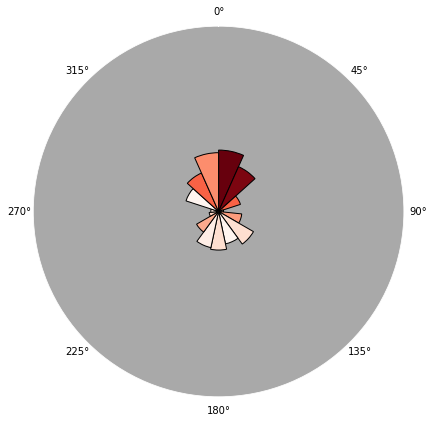

In [17]:
fig = plt.figure(figsize=(15, 15))
    # fig.subplots_adjust(wspace=0)
ax = fig.add_subplot(221,polar=True)
ax.set_facecolor("darkgrey")
##some data wrangling
pdf = df.loc[df["player.name"] == "Leah Williamson"] ##filter only passes for the team in question
pdf = pdf[pdf["type.name"]=="Carry"]
df1 = pdf.loc[:, ["angle1","distance"]] ##just take in lengths and angles of passes
bin_size=24
bins = np.arange(0,360+bin_size,bin_size) ##change 24 to something else if you want more/less bins
df1['bins'] = pd.cut(df1['angle1'], bins, include_lowest=True, right = True)
df1["bin_mids"] = df1["bins"].apply(lambda x: x.mid)
A = df1.groupby(["bin_mids"]).agg(frequency=("distance", "size"), alength = ("distance", "mean")).reset_index()
A["freq"] = minmax_scale(A.frequency) ##scale to [0,1]
#A['distance'] = A['distance'].fillna(value=0)
#A['distance'] = A['distance']
#A['Count'] = df1.groupby('bin_mids',as_index=False)['angle1'].count().angle.tolist()
A["freq"] = minmax_scale(A.frequency) ##scale to [0,1]
A["centers"] = np.deg2rad(A.bin_mids.tolist())
maxl = np.max(A["freq"])
minl = np.min(A["freq"])
normalizedplayer = [(x-minl)/(maxl-minl) for x in A["freq"]]
cmap = plt.get_cmap('Reds')
ax.bar(A["centers"], A.alength, width=np.deg2rad(bin_size),
                bottom=0.0,color=cmap(normalizedplayer), edgecolor='k')
ax.set_theta_zero_location("N")
ax.set_theta_direction("clockwise")
ax.set_ylim(0,20)
ax.set_yticklabels([])
#ax.set_xticklabels([])
ax.grid(False)
ax.spines['polar'].set_color('w')
#ax.patch.set_visible(False)
#cmap = cm.get_cmap("autumn")
#ax.bar(x=A["bin_mids"],height=A["frequency"],width=np.deg2rad(bin_size),bottom=0,color=cmap(norm(np.array(A["alength"]))))
pdf

In [ ]:
df = df[df["underpressure"]==1][["type.name","under_pressure","xstart","ystart","xendpass","yendpass","underpressure","nextactionu_p","nextaction_name","ball_receipt.outcome.name","duration","pass.angle","pass.height.name","pass.length","pass.outcome.name","pass.recipient.name","pass.type.name","play_pattern.name","player.name","position.name","possession_team.name"]]

df['beginning'] = np.sqrt(np.square(120-df['xstart']) + np.square(40 - df['ystart']))
df['end'] = np.sqrt(np.square(120 - df['xendpass']) + np.square(40 - df['yendpass']))
df["distance"] = df["end"] - df["beginning"]
df["prog"] = df["end"]/df["beginning"]
#df['progressive'] = [(df['end'][x]) / (df['beginning'][x]) < .75 for x in range(len(df.beginning))]
df["changex"] = df["xstart"] - df["xendpass"]
df = df.reset_index()
df['angle1'] = np.degrees(np.arctan2(df['yendpass']-df['ystart'],df['xendpass']-df['xstart']))
df['angle1'] = np.where(df['angle1']<0,df['angle1']+360,df['angle1'])
df["pressmover1/3"] = np.where((df["nextactionu_p"]==1) & (df["pass.outcome.name"]!="Incomplete")& (df["xstart"]<=40),1,0)
df["pressmover2/3"] = np.where((df["nextactionu_p"]==1) & (df["pass.outcome.name"]!="Incomplete")& (df["xstart"]>=40.01) & (df["xstart"]<=79.99),1,0)
df["pressmover3/3"] = np.where((df["nextactionu_p"]==1) & (df["pass.outcome.name"]!="Incomplete")& (df["xstart"]>=80),1,0)

df["pressreliever1/3"] = np.where((df["nextactionu_p"]==0) & (df["changex"]>=-15) & (df["changex"]<=15) & (df["xstart"]<=40)& (df["pass.outcome.name"]!="Incomplete") ,1,0)
df["pressreliever2/3"] = np.where((df["nextactionu_p"]==0) & (df["changex"]>=-15) & (df["changex"]<=15) & (df["xstart"]>=40.01)& (df["xstart"]<=79.99)& (df["pass.outcome.name"]!="Incomplete") ,1,0)
df["pressreliever3/3"] = np.where((df["nextactionu_p"]==0) & (df["changex"]>=-15) & (df["changex"]<=15) & (df["xstart"]>=80)& (df["pass.outcome.name"]!="Incomplete") ,1,0)

df["pressbreaker1/3"] = np.where((df["nextactionu_p"]==0) & (df["changex"]<=-15)& (df["pass.outcome.name"]!="Incomplete")& (df["xstart"]<=40),1,0)
df["pressbreaker2/3"] = np.where((df["nextactionu_p"]==0) & (df["changex"]<=-15)& (df["pass.outcome.name"]!="Incomplete")& (df["xstart"]>=40.01) & (df["xstart"]<=79.99) ,1,0)
df["pressbreaker3/3"] = np.where((df["nextactionu_p"]==0) & (df["changex"]<=-15)& (df["pass.outcome.name"]!="Incomplete")& (df["xstart"]>=80),1,0)

df["pressloser1/3"] = np.where((df["pass.outcome.name"]=="Incomplete")& (df["xstart"]<=40),1,0)
df["pressloser2/3"] = np.where((df["pass.outcome.name"]=="Incomplete")& (df["xstart"]>=40.01)& (df["xstart"]<=79.99) ,1,0)
df["pressloser3/3"] = np.where((df["pass.outcome.name"]=="Incomplete")& (df["xstart"]>=80),1,0)
df["pressmover"] = np.where((df["nextactionu_p"]==1) & (df["pass.outcome.name"]!="Incomplete"),1,0)
df["pressreliever"] = np.where((df["nextactionu_p"]==0) & (df["changex"]>=-15) & (df["changex"]<=15) & (df["xstart"]<=80)& (df["pass.outcome.name"]!="Incomplete") ,1,0)
df["pressbreaker"] = np.where((df["nextactionu_p"]==0) & (df["changex"]<=-15)& (df["pass.outcome.name"]!="Incomplete"),1,0)
df["pressloser"] = np.where(df["pass.outcome.name"]=="Incomplete",1,0)

df01 = df.groupby("player.name",sort=True,as_index=False)["pressmover1/3","pressmover2/3","pressmover3/3",
                                                          "pressreliever1/3","pressreliever2/3","pressreliever3/3",
                                                          "pressbreaker1/3","pressbreaker2/3","pressbreaker3/3",
                                                          "pressloser1/3","pressloser2/3","pressloser3/3"].sum()
df02 = df.groupby("player.name",sort=True,as_index=False)["position.name","nextactionu_p","xstart","ystart","possession_team.name","xendpass","yendpass","duration","angle1","changex","pass.length"].mean()
df02 = df02.drop(["player.name"],axis=1)
df000= pd.concat([df01,df02],axis=1)
df03=df01 = df.groupby("player.name",sort=True,as_index=False)["pressmover","pressreliever","pressbreaker","pressloser"].sum()
df0000 = pd.concat([df03,df02],axis=1)
df0000

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, init='random', random_state=0)
cols_list = ["pressmover","pressreliever","pressbreaker","pressloser",
             "xstart","ystart","xendpass","yendpass","duration",
             "angle1","changex","pass.length","nextactionu_p"]
y_km = km.fit_predict(df0000[cols_list])
y_km

In [ ]:
df0000["Cluster"] = y_km
df0000[df0000["Cluster"]==2]

In [ ]:
#We'll do this a couple of times, let's make a function
def plotClusters(xAxis, yAxis):
    plt.scatter(df0000[df0000['Cluster']==0][xAxis], df0000[df0000['Cluster']==0][yAxis], s=40, c='red', label ='Cluster 1')
    plt.scatter(df0000[df0000['Cluster']==1][xAxis], df0000[df0000['Cluster']==1][yAxis], s=40, c='green', label ='Cluster 2')
    plt.scatter(df0000[df0000['Cluster']==2][xAxis], df0000[df0000['Cluster']==2][yAxis], s=40, c='blue', label ='Cluster 3')
    plt.scatter(df0000[df0000['Cluster']==3][xAxis], df0000[df0000['Cluster']==3][yAxis], s=40, c='red', label ='Cluster 4')
    plt.scatter(df0000[df0000['Cluster']==4][xAxis], df0000[df0000['Cluster']==4][yAxis], s=40, c='yellow', label ='Cluster 5')
    #plt.scatter(df000[df000['Cluster']==5][xAxis], df000[df000['Cluster']==5][yAxis], s=40, c='black', label ='Cluster 6')
    #plt.scatter(df000[df000['Cluster']==6][xAxis], df000[df000['Cluster']==6][yAxis], s=40, c='pink', label ='Cluster 7')
    #plt.scatter(df000[df000['Cluster']==7][xAxis], df000[df000['Cluster']==7][yAxis], s=40, c='brown', label ='Cluster 8')
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)    
    plt.legend() 
    
plotClusters('ystart', 'pressbreaker')

In [53]:
df1 = df
##pressmover#
df1["pressmover"] = np.where((df1["nextactionu_p"]==1) & (df1["pass.outcome.name"]!="Incomplete"),1,0)
df1["pressreliever"] = np.where((df1["nextactionu_p"]==0) & (df1["changex"]>=-15) & (df1["changex"]<=15) & (df1["xstart"]<=80)& (df1["pass.outcome.name"]!="Incomplete") ,1,0)
df1["pressbreaker"] = np.where((df1["nextactionu_p"]==0) & (df1["changex"]<=-15)& (df1["pass.outcome.name"]!="Incomplete"),1,0)
df1["pressloser"] = np.where(df1["pass.outcome.name"]=="Incomplete",1,0)

#(np.where((a > 2) & (a < 6), -1, 100))
#np.where((data['COL'] != '01 thing') | 
 #                      (data['COL'] != '02 thing'), 'other', data['COL'])
len(df1[df1["pressbreaker"]==1])
#df2 = df1[df1["pressbreaker"]==1]


1820

In [54]:
df3 = df1.groupby("player.name",sort=True,as_index=False)["pressmover","pressreliever","pressbreaker","pressloser"].sum()
df3 = df3.sort_values(by=["pressloser"],ascending=False).reset_index(drop=True)
df3

C:\Users\philipp.hollenhorst\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,player.name,pressmover,pressreliever,pressbreaker,pressloser
0,Rachel Furness,3,42,10,52
1,Yana Daniels,2,40,24,51
2,Sophie Baggaley,0,19,30,45
3,Lucy Graham,3,57,12,44
4,Danielle Turner,3,51,16,43
5,Felicity Gibbons,1,34,23,42
6,Léa Le Garrec,1,30,12,41
7,Fara Williams,6,41,7,40
8,Janine Beckie,2,35,9,39
9,Lauren Hemp,3,29,10,38


In [55]:
df4 = df
##pressmover#
df4["pressmover1/3"] = np.where((df4["nextactionu_p"]==1) & (df4["pass.outcome.name"]!="Incomplete")& (df4["xstart"]<=40),1,0)
df4["pressmover2/3"] = np.where((df4["nextactionu_p"]==1) & (df4["pass.outcome.name"]!="Incomplete")& (df4["xstart"]>=40.01) & (df4["xstart"]<=79.99),1,0)
df4["pressmover3/3"] = np.where((df4["nextactionu_p"]==1) & (df4["pass.outcome.name"]!="Incomplete")& (df4["xstart"]>=80),1,0)

df4["pressreliever1/3"] = np.where((df4["nextactionu_p"]==0) & (df4["changex"]>=-15) & (df4["changex"]<=15) & (df4["xstart"]<=40)& (df4["pass.outcome.name"]!="Incomplete") ,1,0)
df4["pressreliever2/3"] = np.where((df4["nextactionu_p"]==0) & (df4["changex"]>=-15) & (df4["changex"]<=15) & (df4["xstart"]>=40.01)& (df4["xstart"]<=79.99)& (df4["pass.outcome.name"]!="Incomplete") ,1,0)
df4["pressreliever3/3"] = np.where((df4["nextactionu_p"]==0) & (df4["changex"]>=-15) & (df4["changex"]<=15) & (df4["xstart"]>=80)& (df4["pass.outcome.name"]!="Incomplete") ,1,0)

df4["pressbreaker1/3"] = np.where((df4["nextactionu_p"]==0) & (df4["changex"]<=-15)& (df4["pass.outcome.name"]!="Incomplete")& (df4["xstart"]<=40),1,0)
df4["pressbreaker2/3"] = np.where((df4["nextactionu_p"]==0) & (df4["changex"]<=-15)& (df4["pass.outcome.name"]!="Incomplete")& (df4["xstart"]>=40.01) & (df4["xstart"]<=79.99) ,1,0)
df4["pressbreaker3/3"] = np.where((df4["nextactionu_p"]==0) & (df4["changex"]<=-15)& (df4["pass.outcome.name"]!="Incomplete")& (df4["xstart"]>=80),1,0)

df4["pressloser1/3"] = np.where((df4["pass.outcome.name"]=="Incomplete")& (df4["xstart"]<=40),1,0)
df4["pressloser2/3"] = np.where((df4["pass.outcome.name"]=="Incomplete")& (df4["xstart"]>=40.01)& (df4["xstart"]<=79.99) ,1,0)
df4["pressloser3/3"] = np.where((df4["pass.outcome.name"]=="Incomplete")& (df4["xstart"]>=80),1,0)

df5 = df4.groupby("player.name",sort=True,as_index=False)["pressmover1/3","pressmover2/3","pressmover3/3"].sum()
df5 = df5.sort_values(by=["pressmover2/3"],ascending=False).reset_index(drop=True)
df5

C:\Users\philipp.hollenhorst\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,player.name,pressmover1/3,pressmover2/3,pressmover3/3
0,Jordan Nobbs,2,5,2
1,So-Hyun Cho,1,5,0
2,Jade Bailey,3,5,1
3,Molly Pike,0,5,1
4,Danielle van de Donk,1,5,5
5,Kirsty Barton,0,4,0
6,Rhiannon Roberts,1,4,1
7,Melissa Lawley,0,4,2
8,Tessel Middag,1,4,0
9,Lia Wälti,1,4,0


In [56]:
df6 = df4.groupby("player.name",sort=True,as_index=False)["pressreliever1/3","pressreliever2/3","pressreliever3/3"].sum()
df6 = df6.sort_values(by=["pressreliever2/3"],ascending=False).reset_index(drop=True)
df6

C:\Users\philipp.hollenhorst\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,player.name,pressreliever1/3,pressreliever2/3,pressreliever3/3
0,Caroline Weir,18,90,22
1,Keira Walsh,27,69,21
2,Jill Roord,13,60,25
3,Katie Zelem,24,58,16
4,Leah Williamson,40,57,10
5,Jordan Nobbs,8,51,33
6,Kenza Dali,12,49,26
7,So-yun Ji,12,48,20
8,Katie McCabe,23,48,23
9,Jill Scott,5,47,34


In [57]:
df7 = df4.groupby("player.name",sort=True,as_index=False)["pressbreaker1/3","pressbreaker2/3","pressbreaker3/3"].sum()
df7 = df7.sort_values(by=["pressbreaker3/3"],ascending=False).reset_index(drop=True)
df7

C:\Users\philipp.hollenhorst\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,player.name,pressbreaker1/3,pressbreaker2/3,pressbreaker3/3
0,Tessa Wullaert,2,4,9
1,Kim Little,1,4,7
2,Danielle van de Donk,2,5,6
3,Kenza Dali,1,10,6
4,Guro Reiten,0,5,5
5,Martha Thomas,1,5,4
6,Jonna Andersson,7,10,4
7,Katie Zelem,3,3,4
8,Jill Scott,1,4,4
9,Caroline Weir,4,15,4


In [58]:
df8 = df4.groupby("player.name",sort=True,as_index=False)["pressloser1/3","pressloser2/3","pressloser3/3"].sum()
df8 = df8.sort_values(by=["pressloser2/3"],ascending=False).reset_index(drop=True)
df8

C:\Users\philipp.hollenhorst\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,player.name,pressloser1/3,pressloser2/3,pressloser3/3
0,Rachel Furness,5,34,13
1,Lucy Graham,7,27,10
2,Remi Allen,2,24,7
3,Fara Williams,2,22,16
4,Caroline Weir,3,22,8
5,Yana Daniels,17,21,13
6,Katie McCabe,7,21,9
7,Kit Graham,3,20,9
8,Kayleigh Green,4,20,12
9,Léa Le Garrec,5,20,16


In [59]:
df['angle1'] = np.degrees(np.arctan2(df['yendpass']-df['ystart'],df['xendpass']-df['xstart']))
df['angle1'] = np.where(df['angle1']<0,df['angle1']+360,df['angle1'])
df["distance1"] = np.sqrt( (df["xendpass"] - df["xstart"])**2 + (df["yendpass"] - df["ystart"])**2 )
df

,index,type.name,under_pressure,xstart,ystart,xendpass,yendpass,underpressure,nextactionu_p,nextaction_name,ball_receipt.outcome.name,duration,pass.angle,pass.height.name,pass.length,pass.outcome.name,pass.recipient.name,pass.type.name,play_pattern.name,player.name,position.name,possession_team.name,beginning,end,distance,prog,changex,angle1,pressmover1/3,pressmover2/3,pressmover3/3,pressreliever1/3,pressreliever2/3,pressreliever3/3,pressbreaker1/3,pressbreaker2/3,pressbreaker3/3,pressloser1/3,pressloser2/3,pressloser3/3,pressmover,pressreliever,pressbreaker,pressloser,distance1
0,0,Pass,True,93.0,76.4,110.0,72.4,1,0.0,Pressure,NaN,3.195438,-0.231091,Ground Pass,17.464249,NaN,Alisha Lehmann,NaN,From Free Kick,Martha Thomas,Center Forward,West Ham United LFC,45.320635,33.908111,-11.412524,0.748183,-17.0,346.759480,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,17.464249
1,1,Pass,True,111.9,71.6,115.4,38.7,1,0.0,Ball Receipt*,NaN,1.769362,-1.464812,High Pass,33.085648,Incomplete,Martha Thomas,NaN,From Free Kick,Alisha Lehmann,Right Wing,West Ham United LFC,32.621619,4.780167,-27.841451,0.146534,-3.5,276.072456,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,33.085646
2,2,Pass,True,31.0,25.3,12.3,38.0,1,0.0,Ball Receipt*,NaN,2.097871,2.545001,Ground Pass,22.604866,NaN,Rachael Laws,NaN,Regular Play,Remi Allen,Right Center Midfield,Reading WFC,90.205820,107.718569,17.512748,1.194142,18.7,145.817834,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.604867
3,3,Pass,True,44.7,62.4,31.6,74.8,1,0.0,Ball Receipt*,NaN,1.246062,2.383639,Ground Pass,18.038015,NaN,Kristine Leine,NaN,Regular Play,Angharad James,Left Center Midfield,Reading WFC,78.561123,95.003158,16.442035,1.209290,13.1,136.572430,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,18.038015
4,4,Pass,True,40.8,55.8,53.8,60.0,1,0.0,Ball Receipt*,NaN,1.759209,0.312492,Ground Pass,13.661625,NaN,Alisha Lehmann,NaN,Regular Play,Jacinta Galabadaarachchi,Left Wing,West Ham United LFC,80.760634,69.155188,-11.605446,0.856298,-13.0,17.904448,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,13.661625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14455,14455,Pass,True,89.6,8.1,91.6,23.5,1,0.0,Ball Receipt*,NaN,0.816340,1.441649,Ground Pass,15.529327,NaN,Fara Williams,NaN,From Goal Kick,Mayumi Pacheco,Left Back,Arsenal WFC,44.065519,32.845243,-11.220276,0.745373,-2.0,82.600405,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15.529327
14456,14456,Pass,True,51.8,75.2,49.7,78.2,1,0.0,Ball Receipt*,NaN,1.585610,2.181522,Ground Pass,3.661967,NaN,Leonie Maier,NaN,From Throw In,Vivianne Miedema,Left Wing,Arsenal WFC,76.748160,80.008312,3.260152,1.042479,2.1,124.992020,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3.661967
14457,14457,Pass,True,62.3,14.3,62.3,10.2,1,0.0,Ball Receipt*,NaN,1.003142,-1.570796,High Pass,4.100000,NaN,Mayumi Pacheco,Recovery,From Throw In,Josanne Potter,Left Center Back,Arsenal WFC,63.164705,64.940973,1.776268,1.028121,0.0,270.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,4.100000
14458,14458,Pass,True,65.1,9.1,69.6,8.1,1,0.0,Ball Receipt*,NaN,0.263238,-0.218669,Ground Pass,4.609772,Incomplete,Amalie Vevle Eikeland,NaN,From Throw In,Mayumi Pacheco,Left Back,Arsenal WFC,62.998571,59.647045,-3.351526,0.946800,-4.5,347.471192,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,4.609772


In [60]:
import json
import pandas as pd
from pandas import json_normalize
import numpy as np

import requests
from tqdm import tqdm
from sklearn.preprocessing import minmax_scale

from matplotlib import cm
import matplotlib.pyplot as plt
def pass_sonar_under_pressure(player):
    """Plots the sonar for a team on a matplotlib axes
    """
    fig = plt.figure(figsize=(15, 15))
    # fig.subplots_adjust(wspace=0)
    ax = fig.add_subplot(221,polar=True)
    ax.set_facecolor("darkgrey")
##some data wrangling
    pdf = df.loc[df["player.name"] == player] ##filter only passes for the team in question
    df1 = pdf.loc[:, ["pass.length", "pass.angle"]] ##just take in lengths and angles of passes
    bins = np.linspace(-np.pi, np.pi, 20) ##change 24 to something else if you want more/less bins
    df1['bins'] = pd.cut(df1['pass.angle'], bins, include_lowest=True, right = True)
    df1["bin_mids"] = df1["bins"].apply(lambda x: x.mid)
    A = df1.groupby(["bin_mids"]).agg(frequency=("pass.length", "size"), alength = ("pass.length", "mean")).reset_index()
    A["freq"] = minmax_scale(A.frequency) ##scale to [0,1]

##plot sonar    
    cmap = cm.get_cmap("autumn")
    norm = plt.Normalize() ##default of (0,1) is perfect for us
    bars = ax.bar(A["bin_mids"], A["freq"], width=0.27, bottom=0.01) 
    cm_ = cmap(norm(np.array(A["alength"]))) ##get our color values from the lengths for the bars
    
    ##set color
    [bar.set(facecolor=r, edgecolor="k", linewidth=2) for r, bar in zip(cm_, bars)]
    
##Some axes cosmetics
    ax.set(rlim = [0,1], theta_zero_location = "N") ##orient upwards
    ax.title.set(text=player + " Pressure Pass Sonar", color="k", fontweight="bold", size=7)
    ax.spines['polar'].set_color('k')
    ax.grid(False)
    ax.set_yticklabels([])
    #ax.set_xticklabels([])
    #ax.set_axis_off()


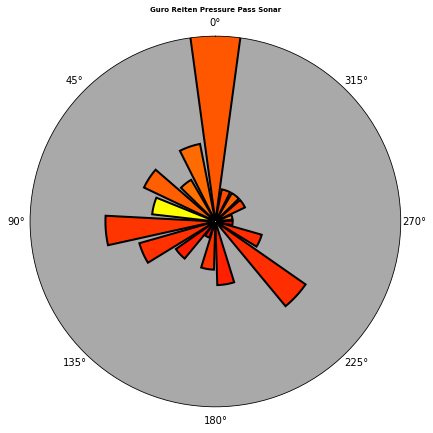

In [61]:
pass_sonar_under_pressure("Guro Reiten")

In [62]:
def pass_sonar_pressbreaker(player):
    """Plots the sonar for a team on a matplotlib axes
    """
    fig = plt.figure(figsize=(15, 15))
    # fig.subplots_adjust(wspace=0)
    ax = fig.add_subplot(221,polar=True)
    ax.set_facecolor("darkgrey")
##some data wrangling
    A = df.copy()
    A1 = A[A["pressbreaker"]==1]
    pdf = A1.loc[A1["player.name"] == player] ##filter only passes for the team in question
    df1 = pdf.loc[:, ["pass.length", "pass.angle"]] ##just take in lengths and angles of passes
    bins = np.linspace(-np.pi, np.pi, 20) ##change 24 to something else if you want more/less bins
    df1['bins'] = pd.cut(df1['pass.angle'], bins, include_lowest=True, right = True)
    df1["bin_mids"] = df1["bins"].apply(lambda x: x.mid)
    A = df1.groupby(["bin_mids"]).agg(frequency=("pass.length", "size"), alength = ("pass.length", "mean")).reset_index()
    A["freq"] = minmax_scale(A.frequency) ##scale to [0,1]

##plot sonar    
    cmap = cm.get_cmap("autumn")
    norm = plt.Normalize() ##default of (0,1) is perfect for us
    bars = ax.bar(A["bin_mids"], A["freq"], width=0.27, bottom=0.01) 
    cm_ = cmap(norm(np.array(A["alength"]))) ##get our color values from the lengths for the bars
    
    ##set color
    [bar.set(facecolor=r, edgecolor="k", linewidth=2) for r, bar in zip(cm_, bars)]
    
##Some axes cosmetics
    ax.set(rlim = [0,1], theta_zero_location = "N") ##orient upwards
    ax.title.set(text=player + " Pressure Pass Sonar", color="k", fontweight="bold", size=7)
    ax.spines['polar'].set_color('k')
    #ax.set_theta_zero_location("S")
    ax.grid(False)
    ax.set_yticklabels([])
    #ax.set_xticklabels([])
    #ax.set_axis_off()


C:\Users\philipp.hollenhorst\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


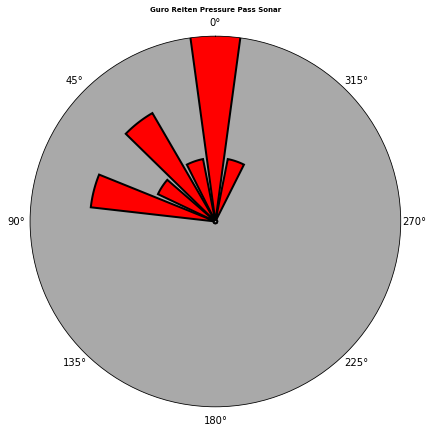

In [63]:
pass_sonar_pressbreaker("Guro Reiten")

C:\Users\philipp.hollenhorst\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\philipp.hollenhorst\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\philipp.hollenhorst\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy 

[]

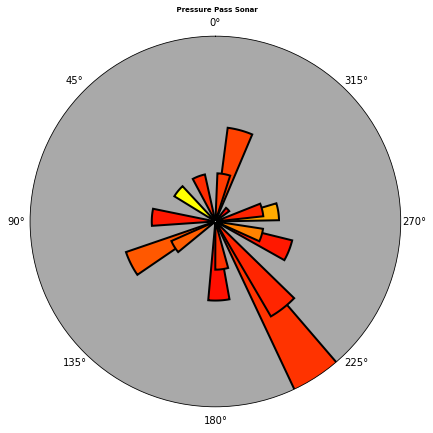

In [64]:
fig = plt.figure(figsize=(15, 15))
# fig.subplots_adjust(wspace=0)
ax = fig.add_subplot(221,polar=True)
ax.set_facecolor("darkgrey")

A1 = df.copy()
pdf1 = A1.loc[A1["player.name"] == "Guro Reiten"] ##filter only passes for the team in question
bin_size = 20
bins = np.arange(0,360+bin_size,bin_size)
pdf1['binned'] = pd.cut( pdf1['angle1'], bins, include_lowest=True, right = True)
pdf1["Bin_Mids"] =  pdf1["binned"].apply(lambda x: x.mid)
pdf1['bins'] = pd.cut(pdf1['angle1'], bins, include_lowest=True, right = True)
pdf1["bin_mids"] = pdf1["bins"].apply(lambda x: x.mid)
A = pdf1.groupby(["bin_mids"]).agg(frequency=("pass.length", "size"), alength = ("pass.length", "mean")).reset_index()
A["freq"] = minmax_scale(A.frequency) ##scale to [0,1]

##plot sonar    
cmap = cm.get_cmap("autumn")
norm = plt.Normalize() ##default of (0,1) is perfect for us
bars = ax.bar(A["bin_mids"], A["freq"], width=0.27, bottom=0.01) 
cm_ = cmap(norm(np.array(A["alength"]))) ##get our color values from the lengths for the bars
    
    ##set color
[bar.set(facecolor=r, edgecolor="k", linewidth=2) for r, bar in zip(cm_, bars)]

##Some axes cosmetics
ax.set(rlim = [0,1], theta_zero_location = "N") ##orient upwards
ax.title.set(text=" Pressure Pass Sonar", color="k", fontweight="bold", size=7)
ax.spines['polar'].set_color('k')
ax.grid(False)
ax.set_yticklabels([])
#ax.set_xticklabels([])
#ax.set_axis_off()
